# Péndulo Forzado Amortiguado
Rodrigo Aguilar Meneses

**1.- Límite lineal**. Considerando ángulos pequeños, tenemos la ecuación lineal forzada y amortiguada vista en clase, cuya solución particular (aquella que domina a tiempos grandes) tiene una función coseno con una cierta amplitud y fase dada en términos de los parametros de la ecuación anterior. Tomando $A = 1$, $\omega_0 = 1$, y $\mu = 0.05$:

__a) Graficar la Amplitud como función de la frecuencia de la fuerza externa $\omega$. ¿Existe alguna resonancia?__

__b) Graficar la fase de la solución como función de la frecuencia de la fuerza externa.__

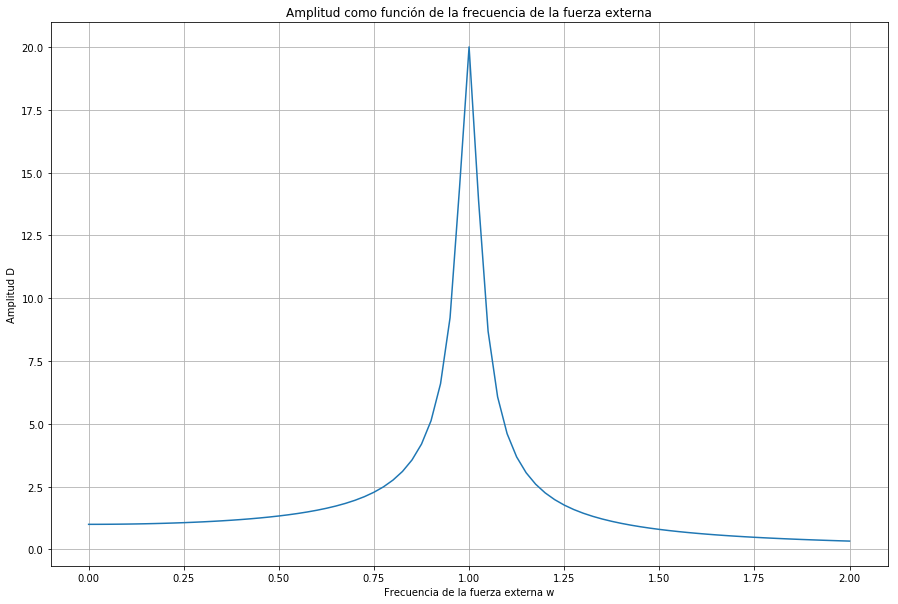

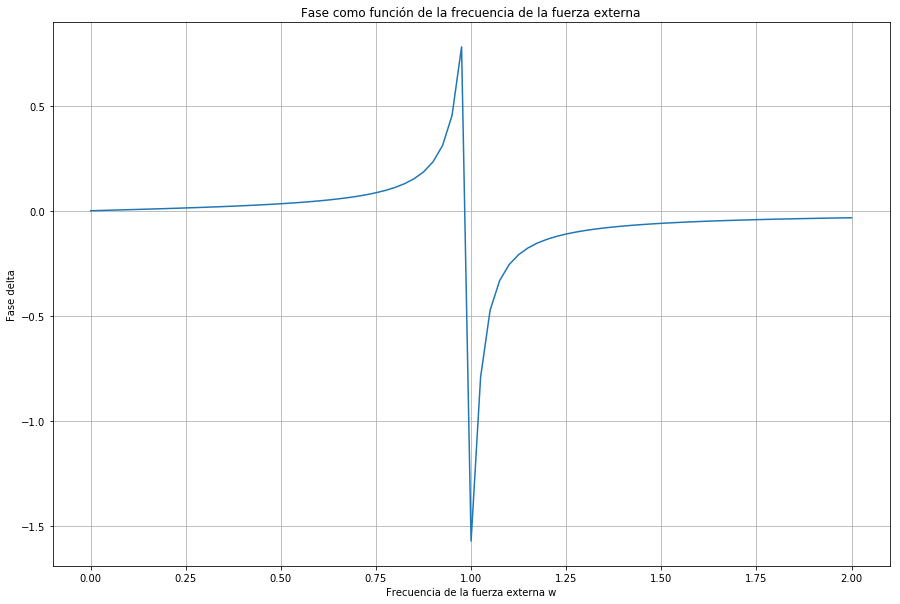

In [3]:
import matplotlib.pyplot as plt
import numpy as np

NMAX = 2

A, w0 = 1, 1
mu = 0.05
beta = mu/2
w = 0

wValues, DValues, deltaValues = [], [], []

while w < NMAX:
    D = A/(np.sqrt((w0**2 - w**2)**2 + 4* w**2 * beta**2)) #cálculo de la amplitud
    
    if(w0 != w):
        delta = np.arctan((2 * w * beta)/(w0**2 - w**2)) #cálculo de la fase
    
    wValues.append(w) #se colocan los datos en listas para después graficar más fácilmente
    DValues.append(D)
    deltaValues.append(delta)
    
    w += 0.025

plt.figure(figsize=(15,10))
plt.plot(wValues, DValues) #gráfica de amplitud vs frecuencia externa
plt.title('Amplitud como función de la frecuencia de la fuerza externa')
plt.ylabel('Amplitud D')
plt.xlabel('Frecuencia de la fuerza externa w')
plt.grid()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(wValues, deltaValues) #gráfica de fase vs frecuencia externa
plt.title('Fase como función de la frecuencia de la fuerza externa')
plt.ylabel('Fase delta')
plt.xlabel('Frecuencia de la fuerza externa w')
plt.grid()
plt.show()

De la primera gráfica se deduce que la resonancia existe para $\omega = 1$. Esto concuerda con la predicción dada por la ecuación $\omega_R = \sqrt{(\omega_0^2 - \beta^2)}$.

De la segunda gráfica podemos notar que existe un aumento en la fase hasta que se llega a la frecuencia de resonancia, en donde, de acuerdo a la predicción, la fase $\delta$ se indefine. Después de esto sigue aumentando y llega a una asíntota horizontal en 0, en el mismo lugar donde inició.


**c) Graficar el ángulo y la velocidad angular como función del tiempo para 2 condiciones iniciales distintas.**

**d) Graficar en el espacio fase las 2 trayectorias con condiciones iniciales distintas del inciso anterior.**

Aquí se define la frecuencia de la fuerza externa w = 1.
Como primeras condiciones iniciales se tienen $D = 1$, $\delta = 0$, $A = 1$, $\phi = 0$.
Como segundas condiciones iniciales se tienen $D = 1.3$, $\delta = \frac{\pi}{2}$, $A = 1$, $\phi = \pi$, donde $D$ es la amplitud de la fuerza externa y $\delta$ su ángulo de desfase.

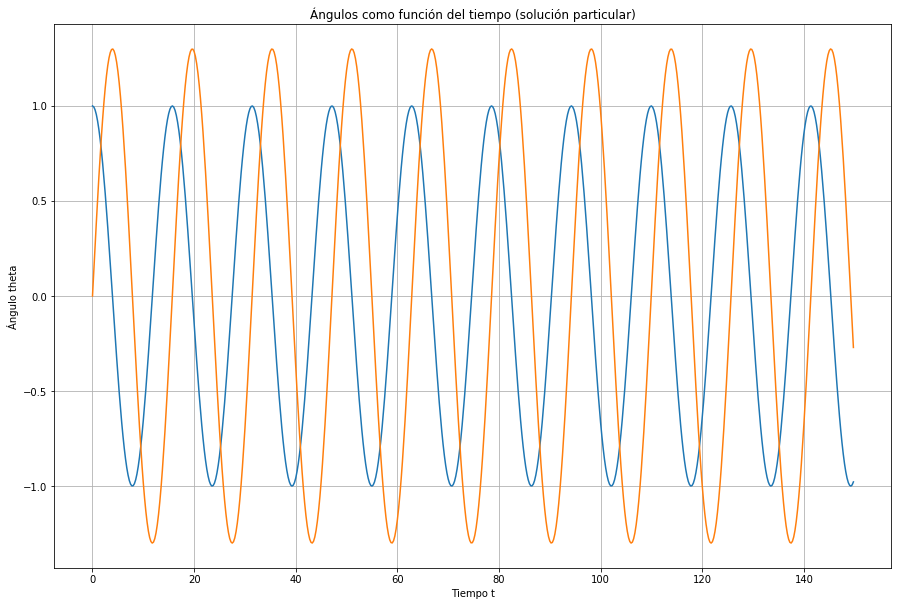

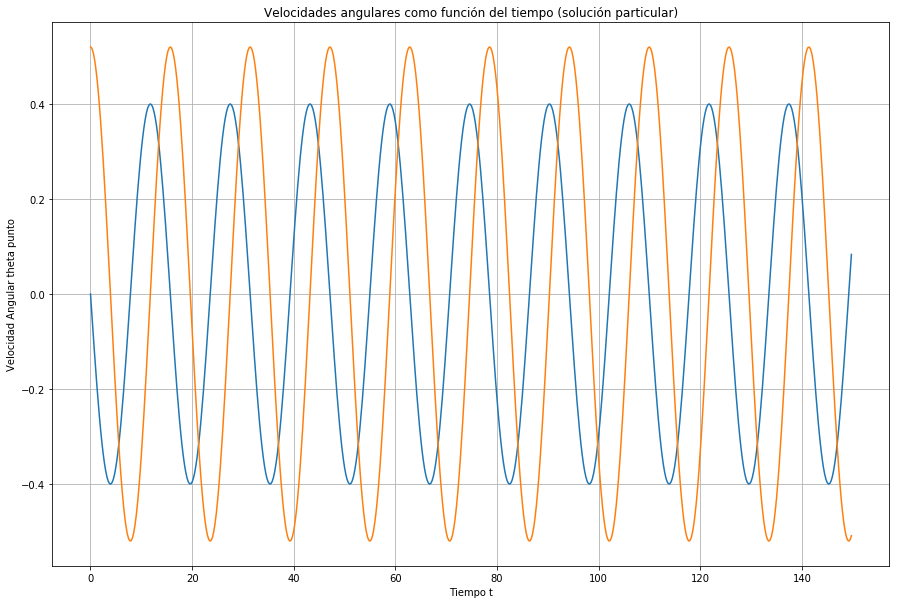

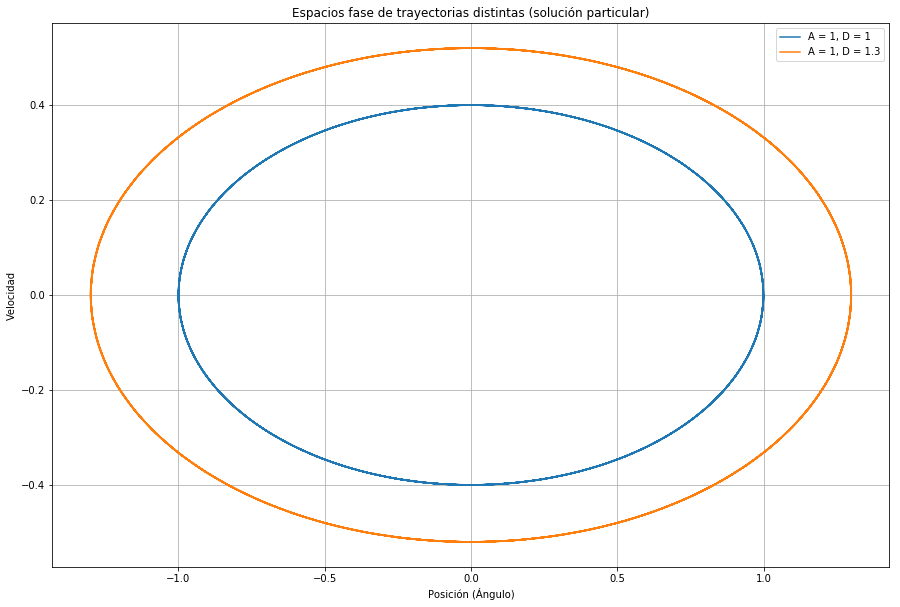

In [33]:
import matplotlib.pyplot as plt
import numpy as np

NMAX = 150

def generate_theta_graphs(D, delta, A, phi, w, w1, thetaPositionValues, thetaVelocityValues, timeValues):
    t = 0
    while(t < NMAX): 
        #thetaPosition = (A*np.exp(-1*beta*t) * np.cos(w1*t - phi)) + (D * np.cos(w*t - delta))
        #thetaVelocity = (-1*A*np.exp(-1*beta*t))*(beta*np.cos(w1*t - phi) + w1*np.sin(w1*t - phi)) + (-1*D * w * np.sin(w*t - delta))
        thetaPosition = (D * np.cos(w*t - delta))
        thetaVelocity = -1*D * w * np.sin(w*t - delta)

        thetaPositionValues.append(thetaPosition)
        thetaVelocityValues.append(thetaVelocity)
        timeValues.append(t)

        t += .25

w = 0.4
w0 = 0.8
mu = 0.05
beta = mu/2
w1 = np.sqrt(w0 ** 2 - beta ** 2)
A = 1

D = 1
phi, delta = 0, 0

thetaPositionValues1, thetaVelocityValues1, timeValues1 = [], [], []
thetaPositionValues2, thetaVelocityValues2, timeValues2 = [], [], []

generate_theta_graphs(D, delta, A, phi, w, w1, thetaPositionValues1, thetaVelocityValues1, timeValues1)

D = 1.3
phi, delta = np.pi, np.pi/2

generate_theta_graphs(D, delta, A, phi, w, w1, thetaPositionValues2, thetaVelocityValues2, timeValues2)

#gráfica de ángulos vs tiempo solución particular
plt.figure(figsize=(15,10))
plt.plot(timeValues1, thetaPositionValues1, timeValues2, thetaPositionValues2) #gráfica de ángulos vs tiempo
plt.title('Ángulos como función del tiempo (solución particular)')
plt.ylabel('Ángulo theta')
plt.xlabel('Tiempo t')
plt.grid()
plt.show()
    
#gráfica de velocidades angulares vs tiempo solución particular
plt.figure(figsize=(15,10))
plt.plot(timeValues1, thetaVelocityValues1, timeValues2, thetaVelocityValues2) 
plt.title('Velocidades angulares como función del tiempo (solución particular)')
plt.ylabel('Velocidad Angular theta punto')
plt.xlabel('Tiempo t')
plt.grid()
plt.show()

#gráfica de espacios fase solución particular
plt.figure(figsize=(15,10))
plt.plot(thetaPositionValues1, thetaVelocityValues1, label = 'A = 1, D = 1')
plt.plot(thetaPositionValues2, thetaVelocityValues2, label = 'A = 1, D = 1.3')
plt.title('Espacios fase de trayectorias distintas (solución particular)')
plt.ylabel('Velocidad')
plt.xlabel('Posición (Ángulo)')
plt.legend()
plt.grid()
plt.show()

En la primera gráfica se observa lo esperado, un comportamiento como un oscilador armónico simple, sin embargo existe un coeficiente de amortiguamiento y la continuación de las oscilaciones se debe a la fuerza externa. Como debe de ser, se observa que el péndulo llega a un extremo y luego viaja al otro, regresa, y así sucesivamente.

En la segunda gráfica se observa la velocidad del péndulo, que de igual manera oscila con el péndulo, cambiando de dirección y pasando por 0 cuando el péndulo llega a sus extremos, y teniendo sus valores máximos cuando éste pasa por el origen.

Hay que notar las líneas comentadas donde se incluye la solución complementaria de la ecuación diferencial. Si no se comentan, se puede observar el efecto de la solución complementaria que muere en un tiempo corto, para dar lugar a un comportamiento regido sólamente por la solución particular. Puesto que este es el comportamiento principal, se muestran las gráficas sólo para esa solución. No obstante, el espacio fase y las gráficas de las soluciones cambian un poco al inicio si se grafica la solución general, pero convergen a la solución particular después de un cierto valor para t.

Finalmente en la tercer gráfica se tiene el espacio fase del oscilador, parte de una familia de elipses que se recorren en sentido horario, porque para la posición $\theta > 0$, la velocidad siempre decrece, y para la posición $\theta < 0$, ésta crece.

**e) Graficar en el espacio fase 2 trayectorias con dos A's distintas, con $\mu = 0$ y la misma condición inicial.**

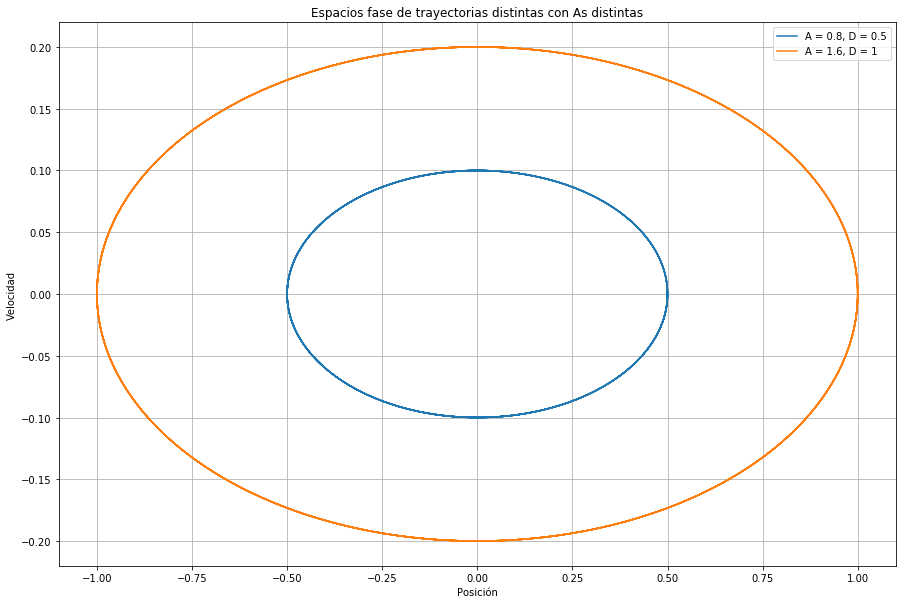

In [34]:
mu, beta = 0, 0
w, w0, w1 = 0.2, 1, 1
A = 0.8 #primera amplitud
D = 0.5
phi, delta = 0, 0 

thetaPositionValues1, thetaVelocityValues1, timeValues1 = [], [], []

generate_theta_graphs(D, delta, A, phi, w, w1, thetaPositionValues1, thetaVelocityValues1, timeValues1)

A = 1.6 #segunda amplitud
D = 1

thetaPositionValues2, thetaVelocityValues2, timeValues2 = [], [], []

generate_theta_graphs(D, delta, A, phi, w, w1, thetaPositionValues2, thetaVelocityValues2, timeValues2)

plt.figure(figsize=(15,10))
plt.plot(thetaPositionValues1, thetaVelocityValues1, label = 'A = 0.8, D = 0.5')
plt.plot(thetaPositionValues2, thetaVelocityValues2, label = 'A = 1.6, D = 1')
plt.title('Espacios fase de trayectorias distintas con As distintas')
plt.ylabel('Velocidad')
plt.xlabel('Posición')
plt.legend()
plt.grid()
plt.show()

En la gráfica se observa que el modificar $A$ no tiene efecto sobre el espacio fase, sino que es la amplitud $D$ de la fuerza externa la que, al menos sólo de observar la gráfica, determina la velocidad y posiciones máximas y mínimas. Esto tiene sentido puesto que la fuerza contrarresta el amortiguamiento (aunque es inexistente en este caso), y por tanto la posición y velocidades máximas ya no dependen de la amplitud inicial del oscilador ($A$). Es por esto que se tiene, por lo menos visto desde el espacio fase, un comportamiento similar a un oscilador armónico simple.

**f) Graficar en el espacio fase 2 trayectorias con $\mu = 0$, $2$, y $0.1$, para la misma amplitud ($A = 1$) y la misma condición inicial.**

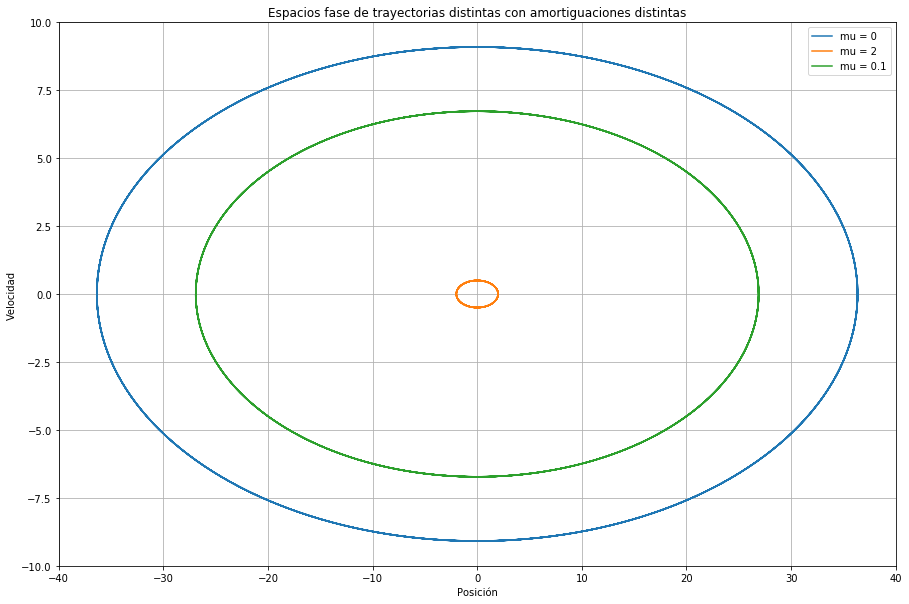

In [39]:
w, w0, w1 = .25, 0.3, 0.3
A = 1 #primera amplitud
phi = 0

mu = 0
beta = mu/2

D = A/(np.sqrt((w0**2 - w**2)**2 + 4* w**2 * beta**2)) #cálculo de la amplitud
delta = np.arctan((2 * w * beta)/(w0**2 - w**2)) #cálculo de la fase

thetaPositionValues1, thetaVelocityValues1, timeValues1 = [], [], []

generate_theta_graphs(D, delta, A, phi, w, w1, thetaPositionValues1, thetaVelocityValues1, timeValues1)

mu = 2
beta = mu/2

D = A/(np.sqrt((w0**2 - w**2)**2 + 4* w**2 * beta**2)) #cálculo de la amplitud
delta = np.arctan((2 * w * beta)/(w0**2 - w**2)) #cálculo de la fase

thetaPositionValues2, thetaVelocityValues2, timeValues2 = [], [], []

generate_theta_graphs(D, delta, A, phi, w, w1, thetaPositionValues2, thetaVelocityValues2, timeValues2)

mu = 0.1
beta = mu/2

D = A/(np.sqrt((w0**2 - w**2)**2 + 4* w**2 * beta**2)) #cálculo de la amplitud
delta = np.arctan((2 * w * beta)/(w0**2 - w**2)) #cálculo de la fase

thetaPositionValues3, thetaVelocityValues3, timeValues3 = [], [], []

generate_theta_graphs(D, delta, A, phi, w, w1, thetaPositionValues3, thetaVelocityValues3, timeValues3)

plt.figure(figsize=(15,10))
plt.plot(thetaPositionValues1, thetaVelocityValues1, label = 'mu = 0')
plt.plot(thetaPositionValues2, thetaVelocityValues2, label = 'mu = 2')
plt.plot(thetaPositionValues3, thetaVelocityValues3, label = 'mu = 0.1')
plt.title('Espacios fase de trayectorias distintas con amortiguaciones distintas')
plt.ylabel('Velocidad')
plt.xlabel('Posición')
plt.legend()
plt.grid()
plt.show()

En la gráfica es evidente el efecto del factor de amortiguamiento $\mu$ en cada gráfica. El elipse azul representa el valor más bajo para $\mu$, mientras que el naranja representa el mayor valor. Esto concuerda con el razonamiento de que a mayor amortiguamiento, se tendrá menor velocidad y desplazamiento si la frecuencia de la fuerza externa se mantiene constante (como se establece en las condiciones iniciales del sistema para este caso).

Debido a que la fuerza externa contrarresta el efecto del amortiguamiento, se tiene un espacio fase como aquél de un oscilador armónico simple.

**2.- Ecuación no lineal no forzada sin amortiguamiento**.

**a) Para un ángulo inicial de 70 grados en reposo y una frecuencia natural unitaria, realiza una gráfica donde compares la solucion numérica del ángulo y su velocidad con aquella de la ecuación lineal usando las mismas condiciones iniciales.**

La ecuación en cuestión es $\theta ''$ + $\omega_0^2$ $\sin \theta = 0$. Puesto que odeint trabaja con ecuaciones de primer orden, la ecuación se debe reducir de orden. Definimos entonces $\phi = \theta '$, tal que $\phi '  = \theta ''$. Por esta definición, $\phi$ es la velocidad angular y puesto que se inicia del reposo, $\phi(0) = 0$. La otra condición inicial está dada como $\theta(0) = 70$. Entonces, con odeint se resolverá el sistema de ecuaciones

$\phi' = -\sin \theta$

$\theta ' = \phi$

recordando que odeint requiere que las ecuaciones estén resueltas para la derivada de primer orden.

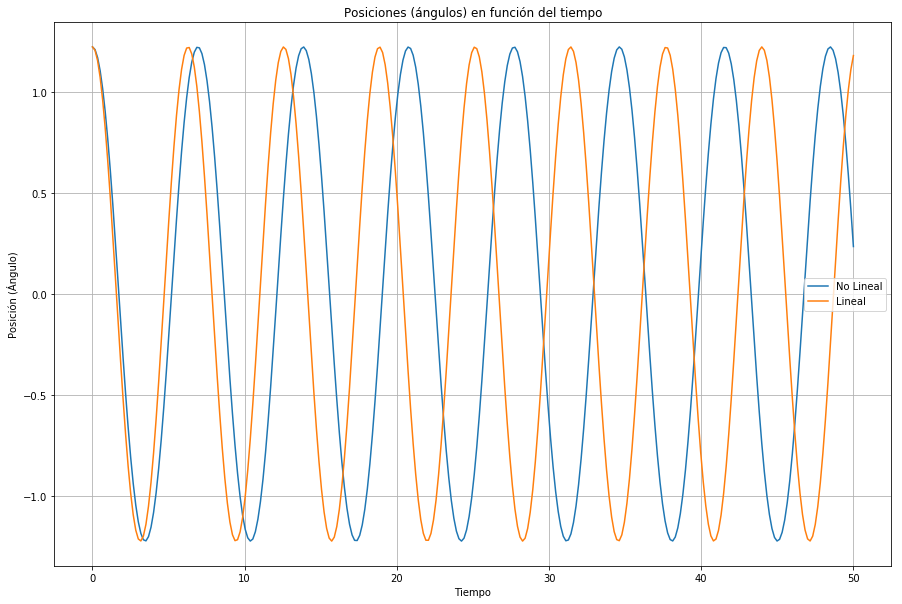

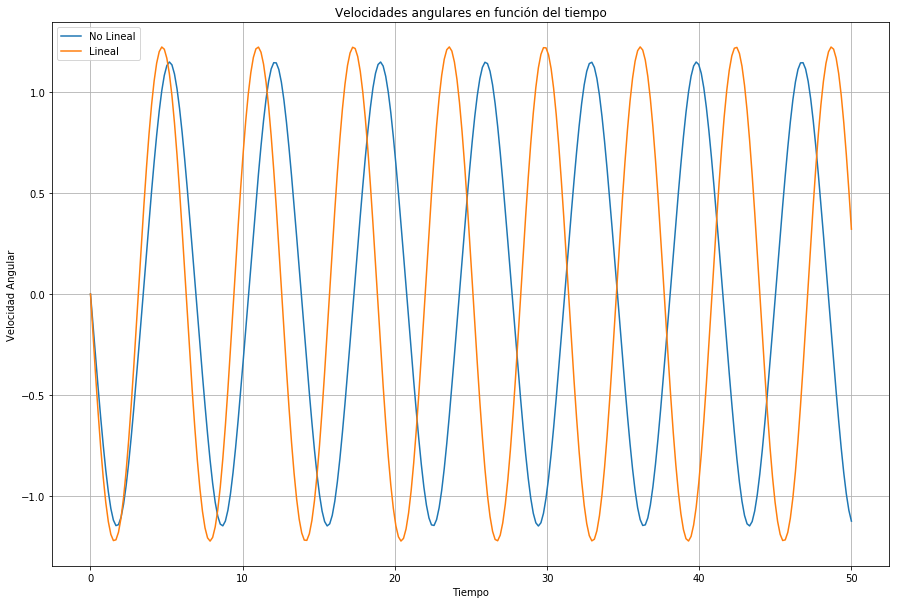

In [40]:
from scipy.integrate import odeint

def nonlinear_eom(z, t):
    phi = z[0]
    theta = z[1]
    
    dphi_dt = -np.sin(theta)
    dtheta_dt = phi
    
    return [dphi_dt, dtheta_dt]

def linear_eom(z, t):
    phi = z[0]
    theta = z[1]
    
    dphi_dt = -theta
    dtheta_dt = phi
    
    return [dphi_dt, dtheta_dt]

initial_conditions = [0, 7*np.pi/18]

t = np.linspace(0, 50, 300)
plt.figure(figsize=(15,10))

nonlinear_solution = odeint(nonlinear_eom, initial_conditions, t)
linear_solution = odeint(linear_eom, initial_conditions, t)

phi_nl = nonlinear_solution[:,0]
theta_nl = nonlinear_solution[:,1]

phi_l = linear_solution[:,0]
theta_l = linear_solution[:,1]

plt.plot(t, theta_nl, label = 'No Lineal')
plt.plot(t, theta_l, label = 'Lineal')
plt.title('Posiciones (ángulos) en función del tiempo')
plt.ylabel('Posición (Ángulo)')
plt.xlabel('Tiempo')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(t, phi_nl, label = 'No Lineal')
plt.plot(t, phi_l, label = 'Lineal')
plt.title('Velocidades angulares en función del tiempo')
plt.ylabel('Velocidad Angular')
plt.xlabel('Tiempo')
plt.grid()
plt.legend()
plt.show()

De ambas gráficas es evidente que la solución lineal está desfasada con la solución no lineal. Este es el resultado esperado pues no se tiene un ángulo inicial muy pequeño, es de 70° y por tanto tiene sentido el desfase: la aproximación $\sin \theta = \theta$ ya no es válida.

Sin embargo, se sigue manteniendo la característica de que, al tener un ángulo de 0°, la velocidad tiene su valor máximo (con el signo indicando su dirección), y para una velocidad angular 0, el ángulo es el máximo alcanzado (hacia cualquier lado del origen).

**b) Construye el espacio fase para una frecuencia natural unitaria, usando trayectorias que partan del reposo con un ángulo inicial que vaya de -90 a 90 grados, en intervalos de 10 grados. Suma dos trayectorias que den vueltas, una encontra de las manecillas del reloj y otra a favor.**

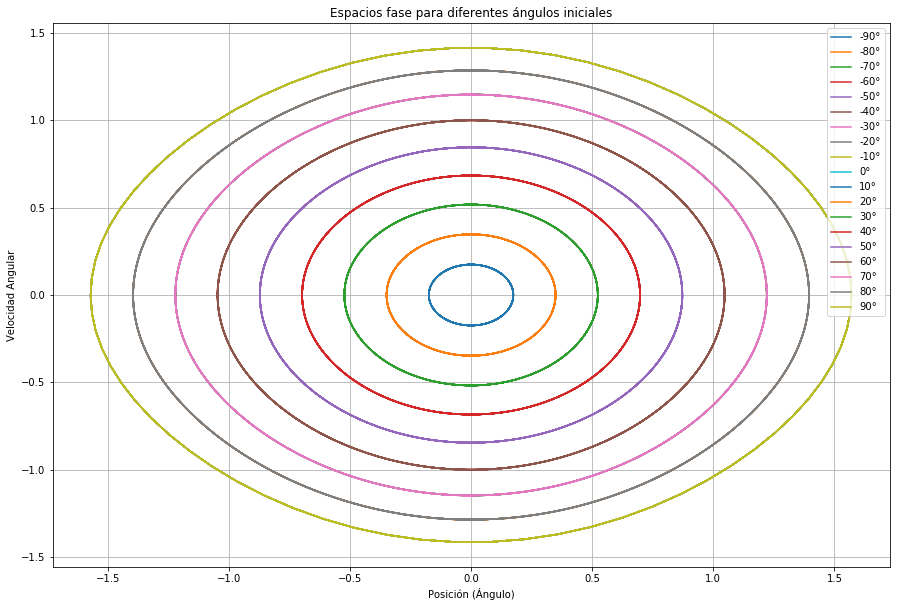

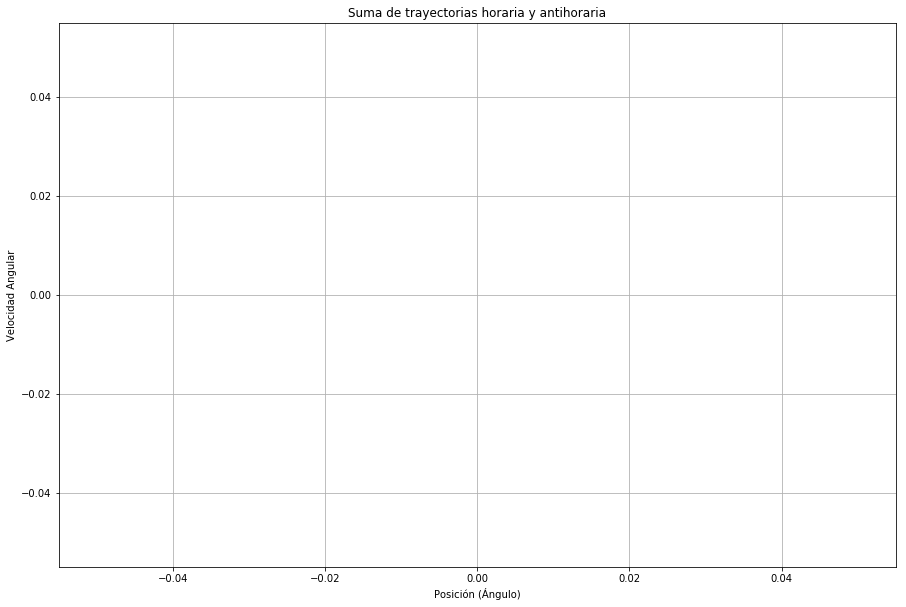

In [43]:
angleList = [-90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
    
t = np.linspace(0, 50, 500)
plt.figure(figsize=(15,10))


for theta in angleList:
    
    thetaRadians = theta * np.pi / 180 #conversión a radianes

    initial_conditions = [0, thetaRadians] #phi, theta

    nonlinear_solution = odeint(nonlinear_eom, initial_conditions, t)

    angularVelocity = nonlinear_solution[:,0] #arreglo de soluciones para la velocidad angular
    positionAngle = nonlinear_solution[:,1] #arreglo de soluciones para la posición (ángulo)
    
    if(theta == -60): #ambos if's son para graficar la suma de trayectorias
        counterTrajectoryVelocity = nonlinear_solution[:,0]
        counterTrajectoryAngle =  nonlinear_solution[:,1]
        
    if(theta == 60):
        clockwiseTrajectoryVelocity = nonlinear_solution[:,0]
        clockwiseTrajectoryAngle =  nonlinear_solution[:,1]
        
    plt.plot(positionAngle, angularVelocity, label = str(theta) + '°')

plt.title('Espacios fase para diferentes ángulos iniciales')
plt.ylabel('Velocidad Angular')
plt.xlabel('Posición (Ángulo)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(counterTrajectoryAngle + clockwiseTrajectoryAngle, counterTrajectoryVelocity + clockwiseTrajectoryVelocity)
plt.title('Suma de trayectorias horaria y antihoraria')
plt.ylabel('Velocidad Angular')
plt.xlabel('Posición (Ángulo)')
plt.grid()

En la gráfica de espacios fase para ángulos entre -90° y 90°, se observa el comportamiento esperado: puesto que el sistema no está amortiguado ni forzado, se tendrá una oscilación continua entre $\theta$ y $-\theta$ como extremos. Estos extremos son los puntos de velocidad angular 0 sobre la gráfica. También hay que notar que las trayectorias para $\theta$ y $-\theta$ están superpuestas puesto que la trayectoria es la misma, la única diferencia es el sentido en el que se recorren (horario para $\theta$). 

Esto se ve reflejado en la segunda gráfica, donde no se observa nada, puesto que se suman valores iguales pero con distinto signo (con diferente dirección). Si por ejemplo, se suman las trayectorias de ángulos diferentes con signo diferente, se tiene una espiral aplastada verticalmente que converge al origen: un atractor. Esto igualmente tiene sentido porque eventualmente las trayectorias se cancelan, llegando al punto de reposo en el origen. Ahora bien, si se suman las trayectorias de ángulos diferentes de igual signo, se tiene también una espiral, pero esta diverge: el origen es un repulsor.

De igual manera podemos observar que para las posiciones 0 (cuando el péndulo atraviesa el origen $\theta = 0$) la velocidad es máxima (o mínima, pero nuevamente esto solo indica la dirección) .

**3.- Ecuación no lineal amortiguada no forzada.**

**a) Utiliza un parámetro de amortiguamiento de 0.02, la frecuencia natural unitaria, y observa cómo el espacio fase se distorsiona. Compara cada trayectoria del inciso b) del ejercio anterior con este caso amortiguado.**

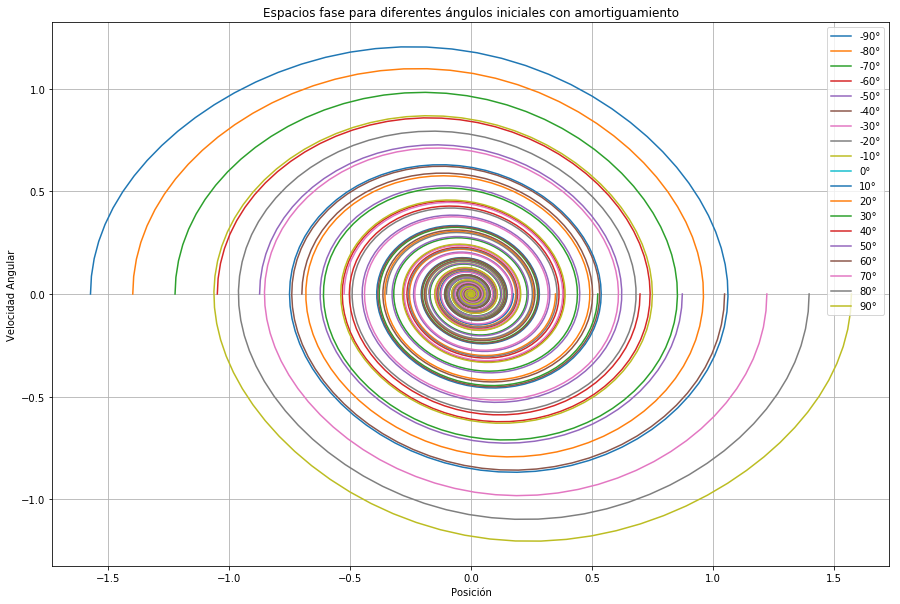

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import odeint

def nonlinear_damped_eom(z, t):
    mu = 0.2
    phi = z[0]
    theta = z[1]
    
    dphi_dt = -(mu * phi + np.sin(theta))
    dtheta_dt = phi
    
    return [dphi_dt, dtheta_dt]

angleList = [-90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
    
t = np.linspace(0, 70, 800)
plt.figure(figsize=(15,10))

for theta in angleList:

    initial_conditions = [0, math.radians(theta)] #phi, theta

    nonlinear_solution = odeint(nonlinear_damped_eom, initial_conditions, t)

    angularVelocity = nonlinear_solution[:,0] #arreglo de soluciones para la velocidad angular
    positionAngle = nonlinear_solution[:,1] #arreglo de soluciones para la posición (ángulo)

    plt.plot(positionAngle, angularVelocity, label = str(theta) + '°')
    
plt.title('Espacios fase para diferentes ángulos iniciales con amortiguamiento')
plt.ylabel('Velocidad Angular')
plt.xlabel('Posición')
plt.grid()
plt.legend()
plt.show()

En el programa los ángulos se convierten a radianes antes de graficar. La gráfica es muy buena puesto que se observa que los espacios fase son simétricos, esto es, el espacio fase de $\theta$ es idéntico al de $-\theta$ pero rotado 180°. Todas las trayectorias comienzan con una velocidad angular 0 (desde el reposo) y en una posición determinada por el ángulo inicial. 

También es importante notar que esta simetría surge del hecho de que al lanzar el péndulo en ángulos iniciales iguales, se tiene el mismo comportamiento en direcciones opuestas (la velocidad tiene sentidos opuestos).

Puesto que se trata de un sistema amortiguado, todas las trayectorias convergen al origen, sin embargo, es importante notar que ninguna de las trayectorias se toca entre sí (lo que concuerda con la teoría), aunque parezca que lo hagan al acercarse más y más al centro, esto es sólo por cuestiones de escala. 

Esto se puede apreciar de mejor manera si se aumenta $\mu$, con lo cual hay más espacio entre las trayectorias y las espirales en el centro se "achatan".

**4.- Ecuación no lineal completa.**

**a) Usando $\mu = \frac{3\pi}{2}$, $\omega = 2\pi$,  $\omega_0 = 3\pi$ , grafica la solución para cinco casos de $A$ alrededor de 1.05. ¿Qué pasa con las soluciones? ¿Qué ocurre si $A = 2$?**

**b) Obtén las trayectorias en el espacio fase de los casos del inciso anterior.**

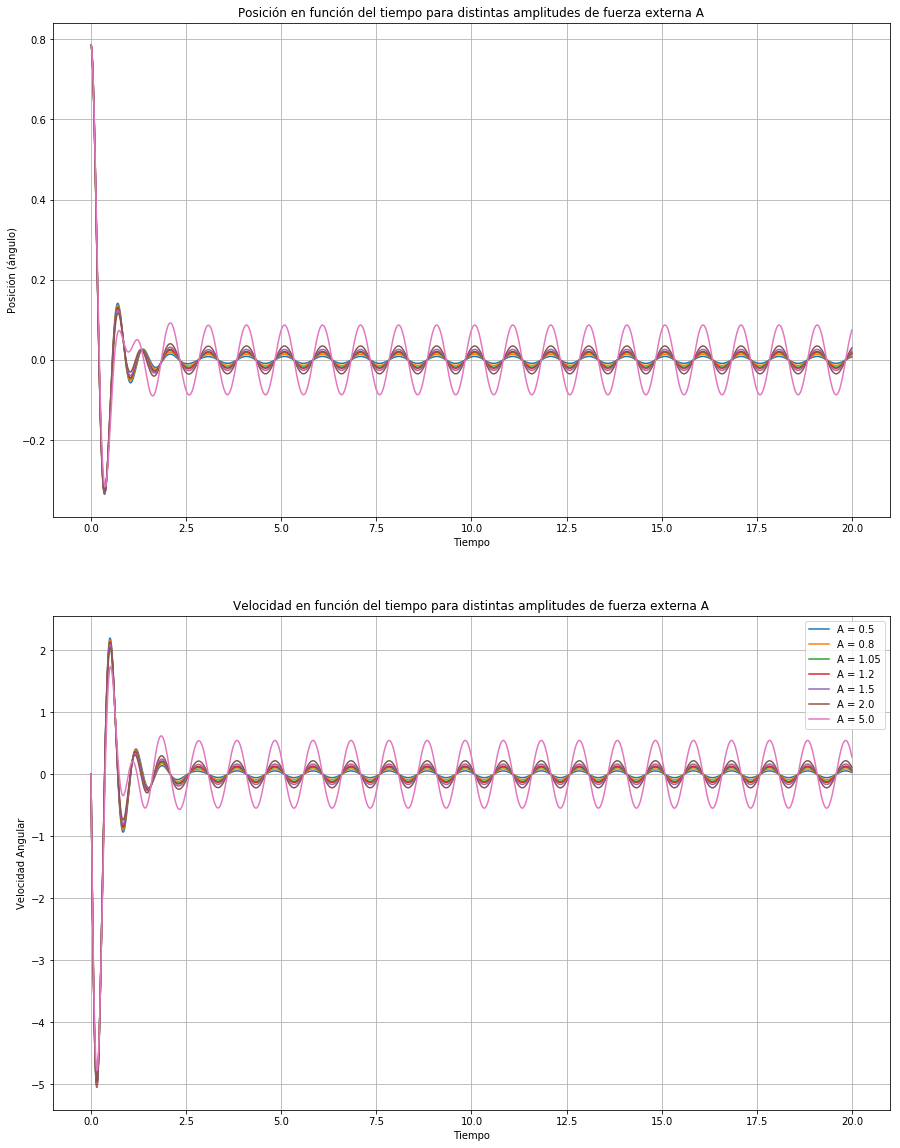

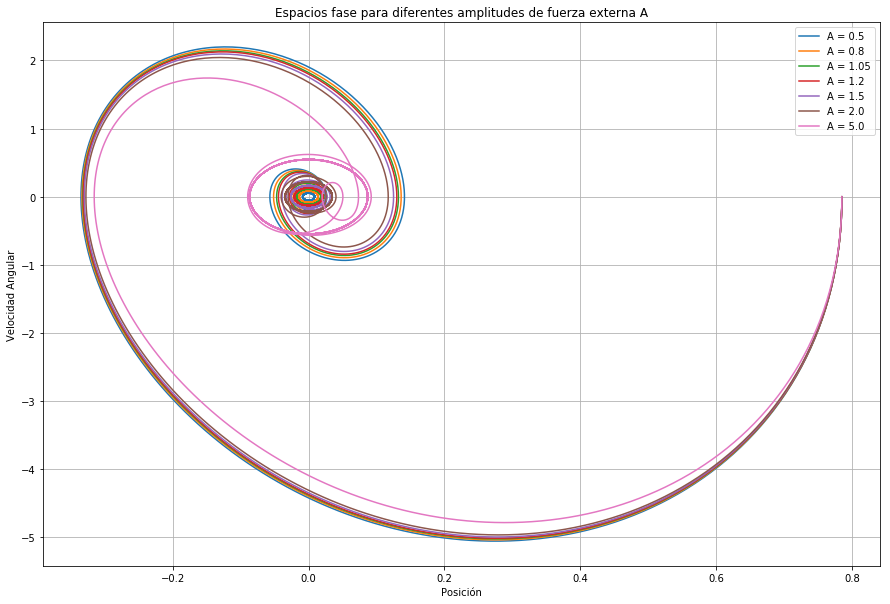

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

def nonlinear_damped_forced_eom(z, t, A):
    mu = 3 * np.pi / 2
    w = 2 * np.pi
    w0 = 3 * np.pi
    phi = z[0]
    theta = z[1]
    
    dphi_dt = A*np.cos(w*t) - (mu * phi + w0**2 * np.sin(theta))
    dtheta_dt = phi
    
    return [dphi_dt, dtheta_dt]

AList = [0.5, 0.8, 1.05, 1.2, 1.5, 2.0, 5.0]
    
t = np.linspace(0, 20, 7000)
initial_conditions = [0, math.radians(45)] #phi, theta

plt.figure(figsize=(15, 20))

angFig = plt.subplot(211)
plt.title('Posición en función del tiempo para distintas amplitudes de fuerza externa A')
plt.ylabel('Posición (ángulo)')
plt.xlabel('Tiempo')
plt.grid()

velFig = plt.subplot(212)
plt.title('Velocidad en función del tiempo para distintas amplitudes de fuerza externa A')
plt.ylabel('Velocidad Angular')
plt.xlabel('Tiempo')
plt.grid()

for A in AList: #para las soluciones de posición vs tiempo
    nonlinear_damped_forced_solution = odeint(nonlinear_damped_forced_eom, initial_conditions, t, args = (A,))

    angularVelocity = nonlinear_damped_forced_solution[:,0] #arreglo de soluciones para la velocidad angular
    positionAngle = nonlinear_damped_forced_solution[:,1] #arreglo de soluciones para la posición (ángulo)
   
    angFig.plot(t, positionAngle, label = 'A = ' + str(A))

    velFig.plot(t, angularVelocity, label = 'A = ' + str(A))

plt.legend()
plt.show()
    

plt.figure(figsize=(15,10))

for A in AList: #para el espacio fase

    nonlinear_damped_forced_solution = odeint(nonlinear_damped_forced_eom, initial_conditions, t, args = (A,))

    angularVelocity = nonlinear_damped_forced_solution[:,0] #arreglo de soluciones para la velocidad angular
    positionAngle = nonlinear_damped_forced_solution[:,1] #arreglo de soluciones para la posición (ángulo)

    plt.plot(positionAngle, angularVelocity, label = 'A = ' + str(A))
    
plt.title('Espacios fase para diferentes amplitudes de fuerza externa A')
plt.ylabel('Velocidad Angular')
plt.xlabel('Posición')
plt.grid()
plt.legend()
plt.show()


En la primer gráfica, donde se muestra la posición en función del tiempo, se observa que aunque el ángulo inicial sea relativamente grande (45°), decae rápidamente por el amortiguamiento. Este decaimiento es un poco más "caótico" conforme se aumenta el valor de $A$, y se puede apreciar de mejor manera para $A = 5$, el valor más grande. Sin embargo, después de decaer del ángulo inicial, la fuerza externa lleva al péndulo a actuar como un oscilador armónico simple, esto es, en la región del tiempo donde prevalece la solución particular y la complementaria carece de importancia.

Para la segunda gráfica, donde se tiene la velocidad angular en función del tiempo, se observa un comportamiento muy similar pero casi opuesto. Esto es lo que debería de ser, puesto que la velocidad actúa en dirección negativa si el ángulo inicial es positivo, y posteriormente, al alcanzar el ángulo máximo negativo, cambia de signo y se repite el proceso. De igual manera se puede observar un comportamiento un tanto "caótico" antes de que la solución complementaria desaparezca, y nuevamente se observa que después de un cierto tiempo $t$ la solución particular es la única que prevalece. También es importante el hecho de que siguen concordando los valores de velocidad y ángulo entre las dos gráficas.

El espacio fase no es más que la combinación de las dos gráficas previas, donde se observa el movimiento amortiguado al inicio, donde la trayectoria parece una espiral. Después pasa por un cierto acomodo que es la parte "caótica", y finalmente se llega a un atractor, donde se forma una elipse que representa el movimiento parecido al armónico simple, generado por el amortiguamiento y la fuerza externa. Nuevamente se observa que para valores de $A$ muy grandes, el comportamiento caótico antes de converger a la elipse se acentúa.